# Lab1. Classification. Var 2
## Download files analysis:
### * Supporting vector machine (SVM)
### * Feedforward neural network

#### 2. EDA (columns, size), refactoring dataset, corr matrix, ways to extend dataset with useful information
#### 3. Explain the results of classification
#### 4. Use Precision, Recall, Accuracy, F1 and confusion matrix.
#### 5. Try to improve classification
#### 6. Introduce the research results with notebook

## 0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## 1. Data preparation

In [2]:
df_train = pd.read_csv('data/dataset_malwares.csv')
df_train.drop_duplicates(inplace=True)
df_train.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [4]:
sum(df_train.isnull().sum())

0

In [5]:
print('Columns with 1 unique elements:\n')
cols_with_1_uniq = [col for col in df_train.columns if len(df_train[col].unique()) == 1]
cols_with_1_uniq

Columns with 1 unique elements:



['e_magic',
 'SectionMaxEntropy',
 'SectionMaxRawsize',
 'SectionMaxVirtualsize',
 'SectionMinPhysical',
 'SectionMinVirtual',
 'SectionMinPointerData',
 'SectionMainChar']

In [6]:
df_train.drop(cols_with_1_uniq, axis=1, inplace=True)

## 2. EDA

In [7]:
df_train.describe()

,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,...,SectionMaxPointerData,SectionMaxChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,19611.000000,...,1.961100e+04,1.961100e+04,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,107.662434,...,2.327726e+07,3.163632e+09,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,1826.995907,...,2.918776e+08,5.860332e+08,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,5.120000e+02,1.073742e+09,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,0.000000,...,4.556800e+04,3.221226e+09,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,0.000000,...,1.413120e+05,3.221226e+09,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,0.000000,...,4.057600e+05,3.221226e+09,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,60447.000000,...,3.763037e+09,4.294967e+09,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


Malware percent:  74.4429146907348
Malware count: 14599
Benign count: 5012


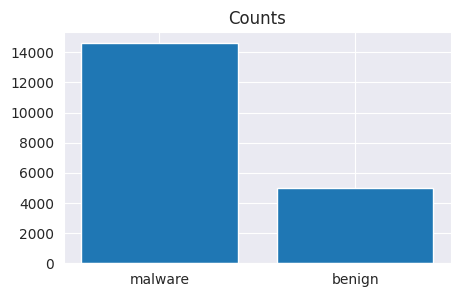

In [8]:
malware_count = len(df_train[df_train['Malware'] == 1])
benign_count = len(df_train[df_train['Malware'] == 0])

fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(['malware', 'benign'], [malware_count, benign_count])
ax.set_title('Counts')

print('Malware percent: ', malware_count/len(df_train)*100)
print('Malware count:', malware_count)
print('Benign count:', benign_count)

#### Выводы: Дизбаланс, 74%

In [9]:
df_train.corr()

/tmp/ipykernel_3669/2315864323.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,...,SectionMaxPointerData,SectionMaxChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
e_cblp,1.000000,0.660911,0.658889,0.612555,0.738562,-0.126543,0.383272,0.499692,0.344250,0.332694,...,-0.002794,0.032012,-0.012362,-0.013954,-0.003183,-0.000563,0.000085,-0.001265,0.359297,-0.000019
e_cp,0.660911,1.000000,0.855558,0.631609,0.679133,-0.134968,0.465528,0.589448,0.484143,0.263771,...,-0.003721,0.024693,-0.016699,-0.018171,-0.004110,-0.000716,0.002131,0.001676,0.279214,0.000095
e_crlc,0.658889,0.855558,1.000000,0.738859,0.793224,-0.147379,0.589649,0.625598,0.548313,0.266980,...,-0.003181,0.022481,-0.018810,-0.018811,-0.003410,-0.000604,0.002046,0.001344,0.324521,0.000651
e_cparhdr,0.612555,0.631609,0.738859,1.000000,0.866721,-0.154192,0.246532,0.618349,0.568015,0.278247,...,-0.003066,0.017369,-0.018842,-0.019757,-0.003320,-0.000570,0.000035,-0.001346,0.299377,0.000036
e_minalloc,0.738562,0.679133,0.793224,0.866721,1.000000,-0.165210,0.496592,0.734340,0.586267,0.317579,...,-0.003211,0.022807,-0.019301,-0.022937,-0.003249,-0.000580,0.000198,-0.001499,0.384137,0.000521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ImageDirectoryEntryExport,-0.000563,-0.000716,-0.000604,-0.000570,-0.000580,0.001919,-0.000247,-0.000517,-0.000421,-0.000885,...,-0.000859,0.003285,0.000809,0.003010,0.007569,1.000000,0.033720,0.023040,-0.000114,0.002499
ImageDirectoryEntryImport,0.000085,0.002131,0.002046,0.000035,0.000198,0.009798,-0.000758,0.001010,0.000445,-0.002855,...,-0.000635,0.032340,0.033719,0.050796,0.041997,0.033720,1.000000,0.227299,0.001845,0.011594
ImageDirectoryEntryResource,-0.001265,0.001676,0.001344,-0.001346,-0.001499,0.005752,-0.000873,-0.000875,-0.000714,-0.003236,...,0.000564,0.020728,0.023624,0.049349,0.029397,0.023040,0.227299,1.000000,0.000513,0.008297
ImageDirectoryEntryException,0.359297,0.279214,0.324521,0.299377,0.384137,-0.099161,-0.000345,0.283131,-0.000617,0.002427,...,-0.000991,0.020704,-0.015547,-0.013903,-0.000445,-0.000114,0.001845,0.000513,1.000000,0.004849


/tmp/ipykernel_3669/862082445.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), mask=np.triu(np.ones_like(df_train.corr())), xticklabels=df_train.corr().columns, yticklabels=df_train.corr().columns, cmap='coolwarm', center=0, annot=True)


Text(0.5, 1.0, 'Correlation')

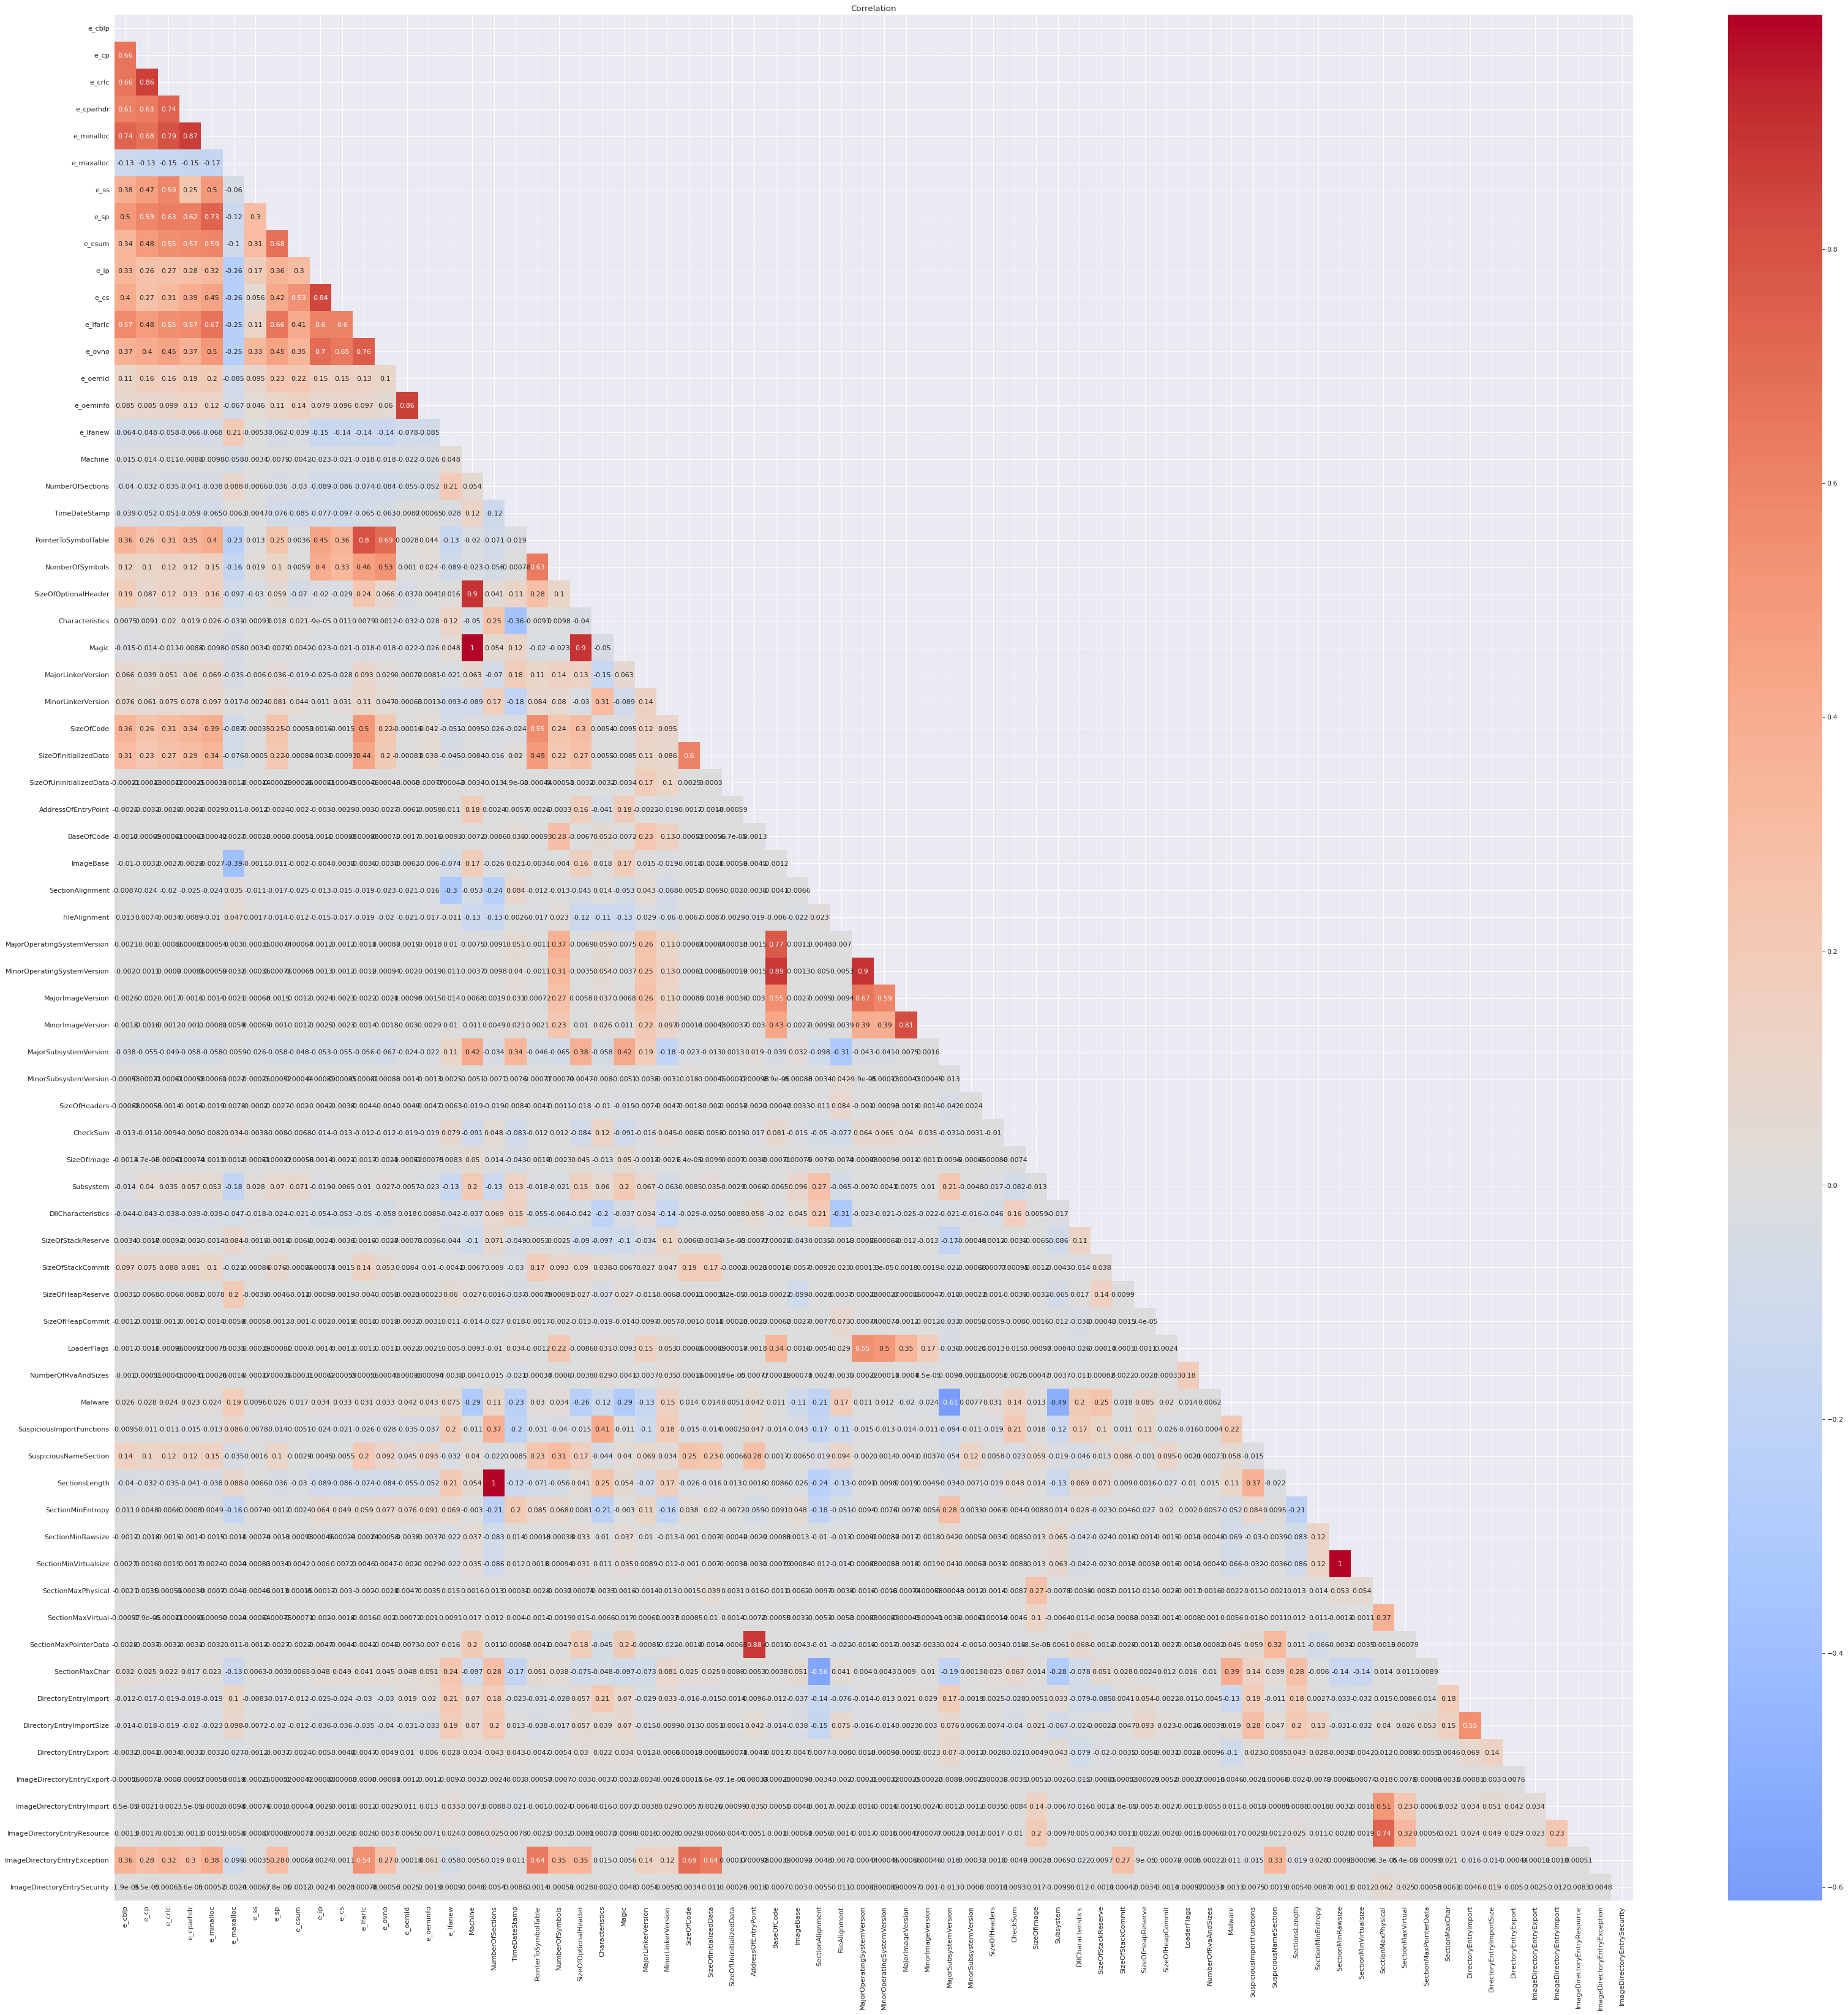

In [10]:
plt.figure(figsize=(50, 50), dpi=80)
sns.heatmap(df_train.corr(), mask=np.triu(np.ones_like(df_train.corr())), xticklabels=df_train.corr().columns, yticklabels=df_train.corr().columns, cmap='coolwarm', center=0, annot=True)

plt.title('Correlation')

In [11]:
y = df_train['Malware']
df_train.drop(['Name', 'Malware'], axis = 1, inplace=True)

## 3. Model Preparation

### 3.1 Data scaler for PCA

In [12]:
scalar_model = StandardScaler()
scaled_model_data = pd.DataFrame(scalar_model.fit_transform(df_train))
scaled_model_data

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,-0.05893,...,-0.078912,1.014413,0.117949,0.394159,-0.091200,-0.015444,-0.074457,-0.070549,-0.019852,-0.040668
1,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,-0.05893,...,-0.078673,1.071671,1.313968,1.645403,-0.091200,-0.015444,-0.030279,-0.038492,-0.021109,-0.024700
2,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,-0.05893,...,-0.079598,0.098279,-0.014942,0.583026,-0.091200,-0.015444,-0.078193,-0.075993,-0.021109,-0.040668
3,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,-0.05893,...,-0.079550,0.103647,0.250840,0.417768,-0.091200,-0.015444,-0.010282,0.066146,-0.021109,0.610281
4,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,-0.05893,...,-0.079564,0.109015,-0.546506,-0.463612,-0.091200,-0.015444,-0.072969,-0.071154,-0.021109,-0.036487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,-0.05893,...,-0.079673,0.098279,0.250840,-0.133095,-0.091200,-0.015444,-0.080726,-0.077807,-0.021109,-0.040668
19607,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,-0.05893,...,-0.015355,0.098279,0.516622,2.274960,-0.091200,-0.015444,0.214412,0.133888,-0.021109,0.829238
19608,-0.180936,-0.049587,-0.040545,-0.043228,-0.040437,-7.044462,-0.016353,-0.181223,-0.029242,-0.05893,...,-0.078875,1.014413,-0.812288,-0.801999,-0.091200,-0.015444,-0.086029,-0.072968,-0.021109,-0.040668
19609,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,-0.05893,...,-0.078535,0.098279,0.782404,0.472854,-0.039572,-0.011363,-0.065856,-0.066920,-0.021109,-0.040668


<Axes: >

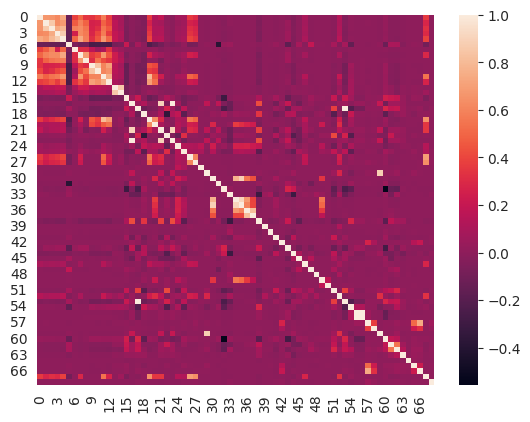

In [13]:
sns.heatmap(scaled_model_data.corr())

### 3.2 PCA for scaler data

In [14]:
pca = PCA(n_components = 30)
pca.fit(scaled_model_data)

PCA(n_components=30)

In [15]:
pca_data = pca.transform(scaled_model_data)
pca_data = pd.DataFrame(pca_data)
pca_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.116886,-0.071543,3.169147,1.602184,-1.085213,-0.447738,0.462341,-0.192473,-0.377227,-0.567632,...,-0.096763,0.042414,0.054563,0.058157,0.089815,-0.461445,0.479556,0.094485,-0.815621,0.818058
1,-0.304038,-0.128504,-0.240216,0.412640,-0.043513,0.239722,0.299085,0.372020,-1.442142,1.242119,...,-0.423358,0.059432,0.077703,-0.066581,0.078654,-0.779483,0.177257,-0.084520,0.090362,0.593200
2,-0.307312,-0.131305,-1.062524,-0.041397,0.513964,-0.061465,-0.257094,-0.440433,-0.243947,0.698966,...,-0.013200,-0.094013,-0.132996,0.190575,-0.036792,-0.342701,0.234299,0.333422,-0.997247,-0.989393
3,-0.282972,-0.168858,-1.310722,1.139849,0.360761,-0.133158,-0.034640,-0.322106,0.573719,-0.503408,...,0.065485,0.128908,0.363949,-0.366838,-0.031373,-0.154503,-0.004293,-0.319599,0.291458,0.035897
4,-0.087824,0.067491,-1.377737,0.482937,0.632797,-0.352419,-0.208689,-0.306293,0.931542,-0.820921,...,0.139835,0.104724,0.094845,-0.288365,-0.438547,0.423473,-0.357038,-0.675061,0.932897,-0.047767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,-0.296658,-0.092296,0.428499,-0.450990,-0.323858,-0.165504,-0.245600,0.267176,-0.545770,-0.331701,...,-0.389590,0.076180,-0.043185,0.072267,0.091750,-0.382512,-0.291942,0.075078,0.235058,0.657920
19607,-0.339777,-0.092916,-0.227828,1.394337,-0.075529,1.999153,0.122184,0.581951,-1.129966,1.087573,...,-0.010237,0.027819,0.314092,-0.336412,0.153915,-0.292271,-0.020565,-0.007078,0.298109,-1.165616
19608,0.624271,-0.050768,0.613738,-2.237503,-0.027290,0.129143,1.649446,0.331364,-0.829548,-1.037403,...,-0.267832,0.002070,-0.084269,0.011696,-0.082320,0.096261,-0.176128,0.036454,0.781601,-0.138363
19609,-0.254203,-0.022570,0.153705,-0.012447,-0.169797,0.073262,0.135414,0.718619,-0.930910,0.535324,...,-0.089142,-0.036631,0.072251,-0.070240,-0.064865,-0.208512,-0.263838,-0.182886,0.537670,0.180528


<Axes: >

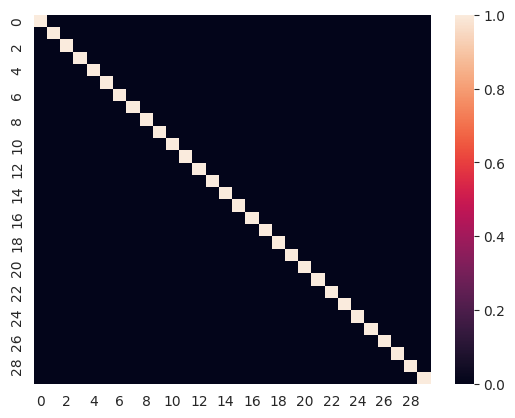

In [16]:
sns.heatmap(pca_data.corr())

### 3.3 Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.2, random_state=0)

In [18]:
print(f'Number of used features is {X_train.shape[1]}')

Number of used features is 30


In [19]:
print('y_train == 0:', len(y_train[y_train == 0]))
print('y_train == 1:', len(y_train[y_train == 1]))
print()
print('y_test == 0:', len(y_test[y_test == 0]))
print('y_test == 1:', len(y_test[y_test == 1]))

y_train == 0: 4008
y_train == 1: 11680

y_test == 0: 1004
y_test == 1: 2919


#### 4. SVC

In [20]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [21]:
svc_pred = svc_model.predict(X_test)

In [22]:
print(confusion_matrix(y_test, svc_pred))

[[ 921   83]
 [  48 2871]]


#### Вывод:
#### <img src="data/table.png">

In [23]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1004
           1       0.97      0.98      0.98      2919

    accuracy                           0.97      3923
   macro avg       0.96      0.95      0.96      3923
weighted avg       0.97      0.97      0.97      3923



#### Вывод:
##### * Accuracy(качество - доля верных ответов). Выборка незбалансирована - критерий не подходит.
##### * Precision(точность - насколько можно доверять модели, когда она выдает положительный класс).
##### Недостаточно, потому что не показывает насколько модель охватывает все положительные метки.
##### * Recall(полнота - доля положительных объектов, которые охватывает модель). В совокупности с precision.
##### // Хорошая модель - высокие precision и recall.
##### * F1-score(гармоническое среднее prec и rec). Для несбалансированных выборок - подходит.

#### 5. Feedforward neural network

In [24]:
mlp_model = MLPClassifier(alpha = 1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [25]:
mlp_model.fit(X_train, y_train)

/home/tonipaltus/Programming/ml_labs/lab1/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1)

In [26]:
mlp_pred = mlp_model.predict(X_test)

In [27]:
print(confusion_matrix(y_test, mlp_pred))

[[ 934   70]
 [  60 2859]]


#### Вывод:
#### <img src="data/table.png">

In [28]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1004
           1       0.98      0.98      0.98      2919

    accuracy                           0.97      3923
   macro avg       0.96      0.95      0.96      3923
weighted avg       0.97      0.97      0.97      3923



## Выводы: Все хорошо работает